# Post-Covid Global Layoff Trends: Insights & Analysis

---

## The COVID-19 pandemic caused unpredictable disruptions in global workforce. This project uncovers Global Layoff Trends Post-COVID (2020–2025), analyzing how industries, company stages, funding levels, and locations influenced workforce reductions worldwide. By transforming raw data into interactive and insightful visualizations, it uncovers hidden patterns, highlights the most affected sectors and regions, and tells a clear story of evolving job market dynamics.

## The goal is to deliver actionable, data-driven insights that are easy to explore and understand, enabling recruiters, analysts, and decision-makers to quickly grasp complex workforce shifts.

---

# Data Information

### Dataset Overview:

### This dataset captures global layoffs from 2020 to April 2025, covering multiple industries, company stages, and countries. It provides insights into workforce reductions, allowing us to explore patterns across time, geography, industry, and funding levels.

### Dataset Source: Kaggle / Public dataset
### Dateset Link: https://www.kaggle.com/datasets/swaptr/layoffs-2022
### Total Records: 4,150
### Columns: 11
### Key features: date, total layoffs, % layoffs, country, location, industry, company, stage, funds raised

---

In [1]:
# For Data handling
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# For SQL queries
import sqlite3

In [2]:
# Loading CSV into python
df = pd.read_csv('layoffs.csv')

In [3]:
df.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Games 24x7,"Mumbai,Non-U.S.",400.0,9/1/2025,NaN,Consumer,https://www.peoplematters.in/news/strategic-hr...,Unknown,$75,India,9/2/2025
1,Mobile Premier League,"Bengaluru,Non-U.S.",300.0,9/1/2025,NaN,Consumer,https://timesofindia.indiatimes.com/technology...,Series E,$375,India,9/2/2025
2,Krutrim,"Bengaluru,Non-U.S.",50.0,9/1/2025,NaN,AI,https://www.techinasia.com/news/olas-krutrim-c...,Unknown,$304,India,9/2/2025
3,Salesforce,SF Bay Area,4000.0,8/31/2025,NaN,Sales,https://www.businessinsider.com/marc-benioff-s...,Post-IPO,$65,United States,9/2/2025
4,Flip,SF Bay Area,NaN,8/29/2025,100%,Consumer,https://www.sfgate.com/tech/article/flip-start...,Series C,$294,United States,8/30/2025


In [4]:
df.shape

(4149, 11)

In [5]:
df.columns

Index(['company', 'location', 'total_laid_off', 'date', 'percentage_laid_off',
       'industry', 'source', 'stage', 'funds_raised', 'country', 'date_added'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              4149 non-null   object 
 1   location             4148 non-null   object 
 2   total_laid_off       2703 non-null   float64
 3   date                 4149 non-null   object 
 4   percentage_laid_off  2633 non-null   object 
 5   industry             4147 non-null   object 
 6   source               4146 non-null   object 
 7   stage                4144 non-null   object 
 8   funds_raised         3688 non-null   object 
 9   country              4147 non-null   object 
 10  date_added           4149 non-null   object 
dtypes: float64(1), object(10)
memory usage: 356.7+ KB


In [7]:
df.describe()

,total_laid_off
count,2703.000000
mean,283.490566
std,976.103479
min,3.000000
25%,40.000000
50%,87.000000
75%,200.000000
max,22000.000000


In [8]:
df.describe(include = 'all')

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
count,4149,4148,2703.000000,4149,2633,4147,4146,4144,3688,4147,4149
unique,2820,265,NaN,1094,73,30,3898,16,718,66,955
top,Microsoft,SF Bay Area,NaN,4/2/2020,100%,Finance,Internal memo,Post-IPO,$1,United States,11/17/2022
freq,15,1034,NaN,27,329,494,101,943,45,2639,45
mean,NaN,NaN,283.490566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,976.103479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking missing values

In [9]:
df.isnull().sum()

company                   0
location                  1
total_laid_off         1446
date                      0
percentage_laid_off    1516
industry                  2
source                    3
stage                     5
funds_raised            461
country                   2
date_added                0
dtype: int64

<Axes: >

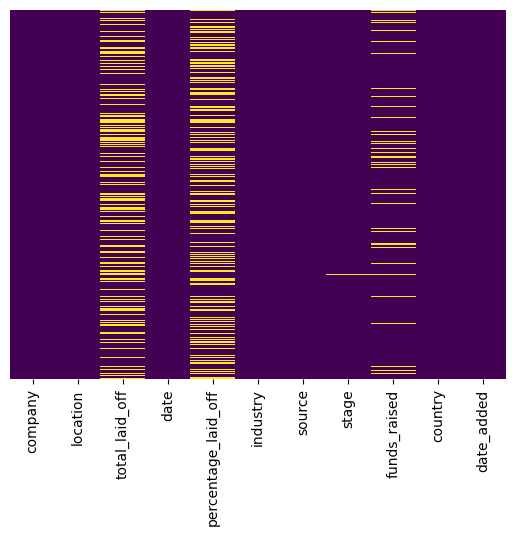

In [10]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

---

# Data Cleaning & Preprocessing

### Check duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

### Data Standardization

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              4149 non-null   object 
 1   location             4148 non-null   object 
 2   total_laid_off       2703 non-null   float64
 3   date                 4149 non-null   object 
 4   percentage_laid_off  2633 non-null   object 
 5   industry             4147 non-null   object 
 6   source               4146 non-null   object 
 7   stage                4144 non-null   object 
 8   funds_raised         3688 non-null   object 
 9   country              4147 non-null   object 
 10  date_added           4149 non-null   object 
dtypes: float64(1), object(10)
memory usage: 356.7+ KB


In [13]:
df['date'] = pd.to_datetime(df['date'], errors = 'coerce')

In [14]:
df['date'] = df['date'].astype('datetime64[ns]')

In [15]:
df['date'].dtype

dtype('<M8[ns]')

In [16]:
df.isnull().sum()

company                   0
location                  1
total_laid_off         1446
date                      0
percentage_laid_off    1516
industry                  2
source                    3
stage                     5
funds_raised            461
country                   2
date_added                0
dtype: int64

In [17]:
df['percentage_laid_off'].unique()[:20]

array([nan, '100%', '9%', '2%', '23%', '10%', '12%', '6%', '34%', '16%',
       '40%', '7%', '14%', '3%', '25%', '4%', '1%', '30%', '17%', '20%'],
      dtype=object)

In [18]:
df['percentage_laid_off'] = df['percentage_laid_off'].astype(str).str.replace('%', '', regex = True)

In [19]:
df['percentage_laid_off'] = df['percentage_laid_off'].fillna(0).astype('float')

In [20]:
df['percentage_laid_off'].dtype

dtype('float64')

In [21]:
df['funds_raised'].unique()[:30]

array(['$75', '$375', '$304', '$65', '$294', '$3500', '$778', '$19', nan,
       '$2', '$548', '$127', '$164', '$26', '$166', '$736', '$1900',
       '$436', '$243', '$15', '$140', '$210', '$565', '$3000', '$726',
       '$9', '$5200', '$8100', '$5', '$602'], dtype=object)

In [22]:
df['funds_raised'] = df['funds_raised'].astype(str).str.replace('$','')

In [23]:
df['funds_raised'].unique()[:30]

array(['75', '375', '304', '65', '294', '3500', '778', '19', 'nan', '2',
       '548', '127', '164', '26', '166', '736', '1900', '436', '243',
       '15', '140', '210', '565', '3000', '726', '9', '5200', '8100', '5',
       '602'], dtype=object)

In [24]:
df['funds_raised'] = df['funds_raised'].fillna(0).astype('float')

In [25]:
df['funds_raised'].dtype

dtype('float64')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company              4149 non-null   object        
 1   location             4148 non-null   object        
 2   total_laid_off       2703 non-null   float64       
 3   date                 4149 non-null   datetime64[ns]
 4   percentage_laid_off  2633 non-null   float64       
 5   industry             4147 non-null   object        
 6   source               4146 non-null   object        
 7   stage                4144 non-null   object        
 8   funds_raised         3688 non-null   float64       
 9   country              4147 non-null   object        
 10  date_added           4149 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(7)
memory usage: 356.7+ KB


In [27]:
df.head(5)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Games 24x7,"Mumbai,Non-U.S.",400.0,2025-09-01,NaN,Consumer,https://www.peoplematters.in/news/strategic-hr...,Unknown,75.0,India,9/2/2025
1,Mobile Premier League,"Bengaluru,Non-U.S.",300.0,2025-09-01,NaN,Consumer,https://timesofindia.indiatimes.com/technology...,Series E,375.0,India,9/2/2025
2,Krutrim,"Bengaluru,Non-U.S.",50.0,2025-09-01,NaN,AI,https://www.techinasia.com/news/olas-krutrim-c...,Unknown,304.0,India,9/2/2025
3,Salesforce,SF Bay Area,4000.0,2025-08-31,NaN,Sales,https://www.businessinsider.com/marc-benioff-s...,Post-IPO,65.0,United States,9/2/2025
4,Flip,SF Bay Area,NaN,2025-08-29,100.0,Consumer,https://www.sfgate.com/tech/article/flip-start...,Series C,294.0,United States,8/30/2025


In [28]:
categorical_cols = ['company','industry','location','stage','source','country']

In [29]:
for col in categorical_cols:
    df[col] = df[col].apply(lambda x: x.strip() if isinstance(x, str) else x)

In [30]:
for col in categorical_cols:
    df[col] = df[col].apply(lambda x: x.title() if isinstance(x, str) else x)

In [31]:
df.head(2)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Games 24X7,"Mumbai,Non-U.S.",400.0,2025-09-01,NaN,Consumer,Https://Www.Peoplematters.In/News/Strategic-Hr...,Unknown,75.0,India,9/2/2025
1,Mobile Premier League,"Bengaluru,Non-U.S.",300.0,2025-09-01,NaN,Consumer,Https://Timesofindia.Indiatimes.Com/Technology...,Series E,375.0,India,9/2/2025


In [32]:
df['location'].unique()[:20]

array(['Mumbai,Non-U.S.', 'Bengaluru,Non-U.S.', 'Sf Bay Area', 'Seattle',
       'Boston', 'London,Non-U.S.', 'Los Angeles', 'Toronto,Non-U.S.',
       'St. Louis', 'Tokyo,Non-U.S.', 'New York City', 'Sydney,Non-U.S.',
       'Cologne,Non-U.S.', 'Bengaluru', 'Detroit', 'Raleigh',
       'Minneapolis', 'Stockholm,Non-U.S.', 'Sacramento', 'Austin'],
      dtype=object)

In [33]:
df['location'] = df['location'].str.split(',', n = 1, expand = True)[0].str.strip()

In [34]:
df.head(5)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Games 24X7,Mumbai,400.0,2025-09-01,NaN,Consumer,Https://Www.Peoplematters.In/News/Strategic-Hr...,Unknown,75.0,India,9/2/2025
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,NaN,Consumer,Https://Timesofindia.Indiatimes.Com/Technology...,Series E,375.0,India,9/2/2025
2,Krutrim,Bengaluru,50.0,2025-09-01,NaN,Ai,Https://Www.Techinasia.Com/News/Olas-Krutrim-C...,Unknown,304.0,India,9/2/2025
3,Salesforce,Sf Bay Area,4000.0,2025-08-31,NaN,Sales,Https://Www.Businessinsider.Com/Marc-Benioff-S...,Post-Ipo,65.0,United States,9/2/2025
4,Flip,Sf Bay Area,NaN,2025-08-29,100.0,Consumer,Https://Www.Sfgate.Com/Tech/Article/Flip-Start...,Series C,294.0,United States,8/30/2025


In [35]:
df.rename(columns =  {'funds_raised': 'funds_raised_millions'}, inplace = True)

In [36]:
df.head(2)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised_millions,country,date_added
0,Games 24X7,Mumbai,400.0,2025-09-01,NaN,Consumer,Https://Www.Peoplematters.In/News/Strategic-Hr...,Unknown,75.0,India,9/2/2025
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,NaN,Consumer,Https://Timesofindia.Indiatimes.Com/Technology...,Series E,375.0,India,9/2/2025


In [37]:
df['year'] = df['date'].dt.year

In [38]:
df['month_name'] = df['date'].dt.month_name()

In [39]:
df.head(5)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised_millions,country,date_added,year,month_name
0,Games 24X7,Mumbai,400.0,2025-09-01,NaN,Consumer,Https://Www.Peoplematters.In/News/Strategic-Hr...,Unknown,75.0,India,9/2/2025,2025,September
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,NaN,Consumer,Https://Timesofindia.Indiatimes.Com/Technology...,Series E,375.0,India,9/2/2025,2025,September
2,Krutrim,Bengaluru,50.0,2025-09-01,NaN,Ai,Https://Www.Techinasia.Com/News/Olas-Krutrim-C...,Unknown,304.0,India,9/2/2025,2025,September
3,Salesforce,Sf Bay Area,4000.0,2025-08-31,NaN,Sales,Https://Www.Businessinsider.Com/Marc-Benioff-S...,Post-Ipo,65.0,United States,9/2/2025,2025,August
4,Flip,Sf Bay Area,NaN,2025-08-29,100.0,Consumer,Https://Www.Sfgate.Com/Tech/Article/Flip-Start...,Series C,294.0,United States,8/30/2025,2025,August


### Handling Missing Values

In [40]:
df.isnull().sum()

company                     0
location                    1
total_laid_off           1446
date                        0
percentage_laid_off      1516
industry                    2
source                      3
stage                       5
funds_raised_millions     461
country                     2
date_added                  0
year                        0
month_name                  0
dtype: int64

<Axes: >

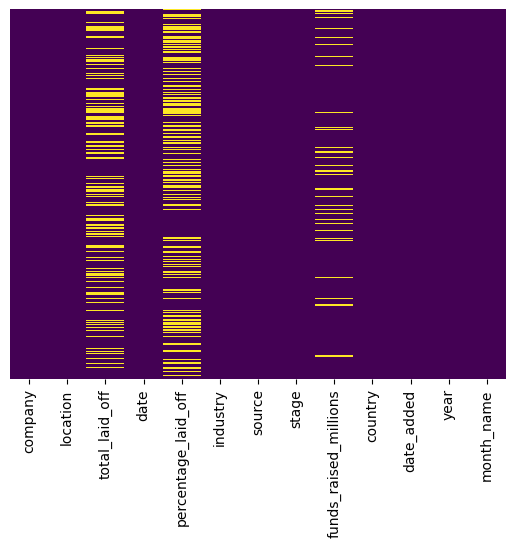

In [41]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [42]:
df['source'] = df['source'].fillna('unknown')

In [43]:
df['stage'] = df['stage'].fillna('unknown')

In [44]:
df.isnull().sum()

company                     0
location                    1
total_laid_off           1446
date                        0
percentage_laid_off      1516
industry                    2
source                      0
stage                       0
funds_raised_millions     461
country                     2
date_added                  0
year                        0
month_name                  0
dtype: int64

In [45]:
df['funds_raised_millions'] = df['funds_raised_millions'].fillna(0)

In [46]:
df['funds_raised_millions'].isnull().sum()

np.int64(0)

In [47]:
df[df['industry'].isnull()][['company','industry']]

,company,industry
30,Eyeo,NaN
1081,Appsmith,NaN


In [48]:
df[df['company'] == 'Eyeo'][['company','industry']].head()

,company,industry
30,Eyeo,NaN


In [49]:
df[df['company'] == 'Appsmith'][['company','industry']].head()

,company,industry
1081,Appsmith,NaN


In [50]:
df.loc[df['company'] == 'Eyeo', 'industry'] = 'Software'

In [51]:
df.loc[df['company'] == 'Appsmith', 'industry'] = 'Software'

In [52]:
df.isnull().sum()

company                     0
location                    1
total_laid_off           1446
date                        0
percentage_laid_off      1516
industry                    0
source                      0
stage                       0
funds_raised_millions       0
country                     2
date_added                  0
year                        0
month_name                  0
dtype: int64

In [53]:
df[df['country'].isnull()][['company','location','country']]

,company,location,country
1073,Fit Analytics,Berlin,NaN
1358,Ludia,Montreal,NaN


In [54]:
df.loc[df['location'] == 'Berlin', 'country'] = 'Germany'

In [55]:
df.loc[df['location'] == 'Montreal', 'country'] = 'Canada'

In [56]:
df.isnull().sum()

company                     0
location                    1
total_laid_off           1446
date                        0
percentage_laid_off      1516
industry                    0
source                      0
stage                       0
funds_raised_millions       0
country                     0
date_added                  0
year                        0
month_name                  0
dtype: int64

In [57]:
df[df['location'].isna()][['location','country']]

,location,country
1039,NaN,United States


In [58]:
df['location'] = df['location'].fillna('Unknown')

In [59]:
df.isnull().sum()

company                     0
location                    0
total_laid_off           1446
date                        0
percentage_laid_off      1516
industry                    0
source                      0
stage                       0
funds_raised_millions       0
country                     0
date_added                  0
year                        0
month_name                  0
dtype: int64

In [60]:
# total_laid_off And percentage_laid_off

missing_both = df[df['total_laid_off'].isnull() & df['percentage_laid_off'].isnull()]
missing_both

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised_millions,country,date_added,year,month_name
6,Verily,Sf Bay Area,NaN,2025-08-26,NaN,Healthcare,Https://Www.Businessinsider.Com/Alphabets-Veri...,Subsidiary,3500.0,United States,8/30/2025,2025,August
7,Klaviyo,Boston,NaN,2025-08-25,NaN,Marketing,Https://Www.Theinformation.Com/Briefings/Klavi...,Unknown,778.0,United States,8/25/2025,2025,August
9,Tiktok,London,NaN,2025-08-22,NaN,Consumer,Https://Www.Wsj.Com/Tech/Tiktok-To-Lay-Off-Hun...,Acquired,0.0,United Kingdom,8/23/2025,2025,August
18,Amdocs,St. Louis,NaN,2025-08-12,NaN,Support,Https://Www.Calcalistech.Com/Ctechnews/Article...,Post-Ipo,0.0,United States,8/18/2025,2025,August
19,Crunchyroll,Tokyo,NaN,2025-08-12,NaN,Media,Https://Www.Thewrap.Com/Crunchyroll-Restructur...,Acquired,26.0,Japan,8/18/2025,2025,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4116,Spothero,Chicago,NaN,2020-03-24,NaN,Transportation,Https://Americaninno.Com/Chicago/Inno-News-Chi...,Series D,117.0,United States,3/28/2020,2020,March
4127,Zwift,Los Angeles,NaN,2020-03-23,NaN,Fitness,Https://Www.Dcrainmaker.Com/2020/03/Zwift-Lays...,Series B,164.0,United States,4/2/2020,2020,March
4133,Vacasa,Portland,NaN,2020-03-20,NaN,Travel,Https://Www.Bizjournals.Com/Portland/News/2020...,Series C,526.0,United States,3/28/2020,2020,March
4138,Anyvision,Tel Aviv,NaN,2020-03-19,NaN,Security,Https://Ipvm.Com/Reports/Anyvision-20-Layoffs,Series A,74.0,Israel,3/30/2020,2020,March


In [61]:
df['industry'].unique()

array(['Consumer', 'Ai', 'Sales', 'Healthcare', 'Marketing', 'Retail',
       'Infrastructure', 'Other', 'Transportation', 'Food', 'Security',
       'Support', 'Media', 'Fitness', 'Finance', 'Software', 'Logistics',
       'Crypto', 'Real Estate', 'Product', 'Data', 'Hardware', 'Hr',
       'Education', 'Energy', 'Manufacturing', 'Travel', 'Aerospace',
       'Recruiting', 'Construction', 'Legal'], dtype=object)

In [62]:
# grouping the data by industry

industry_groups = df.groupby('industry')

In [63]:
# calculating median of total_laid_off for each industry

industry_median = industry_groups['total_laid_off'].median()

In [64]:
industry_median

industry
Aerospace         100.0
Ai                 21.0
Construction      127.0
Consumer          100.0
Crypto             69.0
Data               80.0
Education          95.0
Energy            154.0
Finance            71.0
Fitness           135.0
Food              124.0
Hardware          305.5
Healthcare         82.5
Hr                 59.0
Infrastructure     67.5
Legal              75.0
Logistics          64.0
Manufacturing     108.0
Marketing          52.0
Media              50.0
Other             110.0
Product            35.5
Real Estate       100.0
Recruiting         58.0
Retail            100.0
Sales              70.0
Security           70.0
Software           35.0
Support            95.0
Transportation    129.0
Travel            137.0
Name: total_laid_off, dtype: float64

In [65]:
# Filling Nan in total_laid_off using industry median

df['total_laid_off'] = df['total_laid_off'].fillna(df['industry'].map(industry_median))

In [66]:
df.isnull().sum()

company                     0
location                    0
total_laid_off              0
date                        0
percentage_laid_off      1516
industry                    0
source                      0
stage                       0
funds_raised_millions       0
country                     0
date_added                  0
year                        0
month_name                  0
dtype: int64

In [67]:
# Grouping industry wise median

industry_median_pct = df.groupby('industry')['percentage_laid_off'].median()

In [68]:
industry_median_pct

industry
Aerospace         25.0
Ai                20.0
Construction      16.0
Consumer          17.0
Crypto            20.0
Data              13.5
Education         20.0
Energy            25.0
Finance           20.0
Fitness           18.0
Food              20.0
Hardware           7.0
Healthcare        20.0
Hr                15.0
Infrastructure    13.0
Legal             10.0
Logistics         15.0
Manufacturing     15.0
Marketing         14.0
Media             15.0
Other             15.0
Product           16.0
Real Estate       22.0
Recruiting        17.5
Retail            18.0
Sales              9.5
Security          10.0
Software          32.5
Support           10.0
Transportation    17.0
Travel            22.0
Name: percentage_laid_off, dtype: float64

In [69]:
## Filling missing percentage_laid_off 

df['percentage_laid_off'] = df['percentage_laid_off'].fillna(df['industry'].map(industry_median_pct))

In [70]:
df['percentage_laid_off'].isnull().sum()

np.int64(0)

In [71]:
df.isnull().sum()

company                  0
location                 0
total_laid_off           0
date                     0
percentage_laid_off      0
industry                 0
source                   0
stage                    0
funds_raised_millions    0
country                  0
date_added               0
year                     0
month_name               0
dtype: int64

In [72]:
df.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised_millions,country,date_added,year,month_name
0,Games 24X7,Mumbai,400.0,2025-09-01,17.0,Consumer,Https://Www.Peoplematters.In/News/Strategic-Hr...,Unknown,75.0,India,9/2/2025,2025,September
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,17.0,Consumer,Https://Timesofindia.Indiatimes.Com/Technology...,Series E,375.0,India,9/2/2025,2025,September
2,Krutrim,Bengaluru,50.0,2025-09-01,20.0,Ai,Https://Www.Techinasia.Com/News/Olas-Krutrim-C...,Unknown,304.0,India,9/2/2025,2025,September
3,Salesforce,Sf Bay Area,4000.0,2025-08-31,9.5,Sales,Https://Www.Businessinsider.Com/Marc-Benioff-S...,Post-Ipo,65.0,United States,9/2/2025,2025,August
4,Flip,Sf Bay Area,100.0,2025-08-29,100.0,Consumer,Https://Www.Sfgate.Com/Tech/Article/Flip-Start...,Series C,294.0,United States,8/30/2025,2025,August


### Removing columns which are not necessary

In [73]:
df = df.drop(columns = ['date_added','source'])

In [74]:
df.head()

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised_millions,country,year,month_name
0,Games 24X7,Mumbai,400.0,2025-09-01,17.0,Consumer,Unknown,75.0,India,2025,September
1,Mobile Premier League,Bengaluru,300.0,2025-09-01,17.0,Consumer,Series E,375.0,India,2025,September
2,Krutrim,Bengaluru,50.0,2025-09-01,20.0,Ai,Unknown,304.0,India,2025,September
3,Salesforce,Sf Bay Area,4000.0,2025-08-31,9.5,Sales,Post-Ipo,65.0,United States,2025,August
4,Flip,Sf Bay Area,100.0,2025-08-29,100.0,Consumer,Series C,294.0,United States,2025,August


#### The dataset was cleaned and standardized to ensure accuracy and consistency. Missing values in columns like total_laid_off, percentage_laid_off, and industry were handled logically, while categorical columns were standardized and stripped. Dates and numeric columns were converted to appropriate types, and year-month features were extracted for time-based analysis. Duplicates were removed, making the dataset ready for SQL queries, EDA, and visualizations.

---

# SQL Analysis

In [75]:
# Creating a connection to a new SQLite database

conn = sqlite3.connect('layoffs.db')

In [76]:
c = conn.cursor()

In [77]:
# loading clean dataframe into sqlite

df.to_sql('layoffs',conn, if_exists = 'replace', index = False)

4149

In [78]:
# Verifying table creation

pd.read_sql_query('SELECT * FROM layoffs LIMIT 5;', conn)

,company,location,total_laid_off,date,percentage_laid_off,industry,stage,funds_raised_millions,country,year,month_name
0,Games 24X7,Mumbai,400.0,2025-09-01 00:00:00,17.0,Consumer,Unknown,75.0,India,2025,September
1,Mobile Premier League,Bengaluru,300.0,2025-09-01 00:00:00,17.0,Consumer,Series E,375.0,India,2025,September
2,Krutrim,Bengaluru,50.0,2025-09-01 00:00:00,20.0,Ai,Unknown,304.0,India,2025,September
3,Salesforce,Sf Bay Area,4000.0,2025-08-31 00:00:00,9.5,Sales,Post-Ipo,65.0,United States,2025,August
4,Flip,Sf Bay Area,100.0,2025-08-29 00:00:00,100.0,Consumer,Series C,294.0,United States,2025,August


In [79]:
# Checking total number of rows

pd.read_sql_query('SELECT COUNT(*) AS total_rows FROM layoffs;', conn)

,total_rows
0,4149


In [80]:
# Checking distinct industries

pd.read_sql_query('SELECT DISTINCT industry FROM layoffs;', conn)

,industry
0,Consumer
1,Ai
2,Sales
3,Healthcare
4,Marketing
5,Retail
6,Infrastructure
7,Other
8,Transportation
9,Food


In [81]:
# Checking Distinct countries

pd.read_sql_query('SELECT DISTINCT country FROM layoffs;', conn)

,country
0,India
1,United States
2,United Kingdom
3,Canada
4,Japan
...,...
61,Turkey
62,Russia
63,Bulgaria
64,South Africa


In [82]:
## Total layoffs per industry

industry_layoffs_query = '''
SELECT industry,
SUM(total_laid_off) AS total_laid_off
FROM layoffs
GROUP BY industry
ORDER BY total_laid_off DESC;
'''

In [83]:
industry_layoffs = pd.read_sql_query(industry_layoffs_query, conn)

In [84]:
industry_layoffs

,industry,total_laid_off
0,Hardware,93554.5
1,Other,92777.0
2,Consumer,86656.0
3,Retail,84921.0
4,Transportation,74773.0
5,Finance,64175.0
6,Food,60348.0
7,Healthcare,48544.0
8,Travel,27891.0
9,Real Estate,26946.0


In [85]:
## Average percentage laid off per industry

industry_avg_pct_query = '''
SELECT industry, AVG(percentage_laid_off) AS avg_percentage
FROM layoffs
GROUP BY industry
ORDER BY avg_percentage DESC;
'''

In [86]:
industry_pct = pd.read_sql_query(industry_avg_pct_query, conn)

In [87]:
industry_pct

,industry,avg_percentage
0,Aerospace,37.750000
1,Energy,32.956522
2,Software,32.500000
3,Food,32.380753
4,Ai,31.541667
5,Construction,30.000000
6,Healthcare,29.537267
7,Travel,29.019048
8,Real Estate,28.975309
9,Crypto,28.183007


In [88]:
## Top 10 companies by layoffs

companies_layoff_query = '''
SELECT company, total_laid_off
FROM layoffs
ORDER BY total_laid_off DESC
LIMIT 10;
'''

In [89]:
top_companies = pd.read_sql_query(companies_layoff_query, conn)

In [90]:
top_companies

,company,total_laid_off
0,Intel,22000.0
1,Intel,15000.0
2,Tesla,14000.0
3,Google,12000.0
4,Meta,11000.0
5,Meta,10000.0
6,Microsoft,10000.0
7,Amazon,10000.0
8,Microsoft,9000.0
9,Amazon,9000.0


In [91]:
## Company wise total layoffs

company_total_layoffs_query = '''
SELECT company,
       SUM(total_laid_off) AS total_layoffs
FROM layoffs
GROUP BY company
ORDER BY total_layoffs DESC;
'''

In [92]:
company_total_layoffs = pd.read_sql_query(company_total_layoffs_query, conn)

In [93]:
company_total_layoffs.head(10)

,company,total_layoffs
0,Intel,43726.0
1,Microsoft,30673.0
2,Amazon,28540.0
3,Meta,25000.0
4,Salesforce,16140.0
5,Tesla,14629.0
6,Cisco,14521.0
7,Google,14247.0
8,Dell,13261.0
9,Sap,11000.0


In [94]:
## Year wise trends of layoffs

yearly_layoff_query = '''
SELECT year, SUM(total_laid_off) AS total_laid_off
FROM layoffs
GROUP BY year
ORDER BY year;
'''

In [95]:
yearly_trend = pd.read_sql_query(yearly_layoff_query, conn)

In [96]:
yearly_trend

,year,total_laid_off
0,2020,95606.0
1,2021,16892.5
2,2022,202237.0
3,2023,313984.5
4,2024,176867.5
5,2025,94847.0


In [97]:
## Country wise total layoffs

country_layoffs_query = '''
SELECT country, SUM(total_laid_off) AS total_laid_off
FROM layoffs
GROUP BY country
ORDER BY total_laid_off DESC;
'''

In [98]:
country_layoffs = pd.read_sql_query(country_layoffs_query, conn)

In [99]:
country_layoffs

,country,total_laid_off
0,United States,616926.0
1,India,66945.0
2,Germany,34473.5
3,United Kingdom,27880.5
4,Netherlands,20251.0
...,...,...
61,Hungary,67.5
62,Thailand,55.0
63,Ukraine,50.0
64,Philippines,50.0


In [100]:
## Stage wise layoffs

stage_layoffs_query = '''
SELECT stage, SUM(total_laid_off) AS total_laid_off
FROM layoffs
GROUP BY stage
ORDER BY total_laid_off DESC;
'''

In [101]:
stage_layoffs = pd.read_sql_query(stage_layoffs_query, conn)

In [102]:
stage_layoffs

,stage,total_laid_off
0,Post-Ipo,478719.5
1,Unknown,101464.5
2,Acquired,79979.0
3,Series B,45275.5
4,Series C,40400.0
5,Series D,35381.0
6,Series E,28870.0
7,Series A,18637.0
8,Series F,16937.5
9,Private Equity,14151.5


In [103]:
## Analysing both months and year wise trend by grouping them

month_year_trend_query = '''
SELECT year, month_name, SUM(total_laid_off) AS total_laid_off
FROM layoffs
GROUP BY year, month_name
ORDER BY year, month_name;
'''

In [104]:
month_year_trend = pd.read_sql_query(month_year_trend_query, conn)

In [105]:
month_year_trend

,year,month_name,total_laid_off
0,2020,April,32490.0
1,2020,August,2755.0
2,2020,December,852.0
3,2020,July,7724.0
4,2020,June,8455.0
...,...,...,...
62,2025,July,17440.5
63,2025,June,2422.0
64,2025,March,9322.0
65,2025,May,11291.0


In [106]:
## Analysing both Industry and Country trends by grouping them

industry_country_query = '''
SELECT industry, country, SUM(total_laid_off) AS total_laid_off
FROM layoffs
GROUP BY industry, country
ORDER BY total_laid_off DESC;
'''

In [107]:
industry_country = pd.read_sql_query(industry_country_query, conn)

In [108]:
industry_country

,industry,country,total_laid_off
0,Hardware,United States,88550.5
1,Consumer,United States,70546.0
2,Other,United States,62397.0
3,Retail,United States,57134.0
4,Transportation,United States,51479.0
...,...,...,...
410,Real Estate,Israel,11.0
411,Logistics,Israel,10.0
412,Product,United Kingdom,10.0
413,Crypto,United Arab Emirates,9.0


In [109]:
# Funding wise layoff trend analysis

funding_layoffs_query = '''
SELECT stage, 
       AVG(funds_raised_millions) AS avg_funds_raised, 
       SUM(total_laid_off) AS total_laid_off
FROM layoffs
GROUP BY stage
ORDER BY total_laid_off DESC;
'''

In [110]:
funding_layoffs = pd.read_sql_query(funding_layoffs_query, conn)

In [111]:
funding_layoffs

,stage,avg_funds_raised,total_laid_off
0,Post-Ipo,1920.109226,478719.5
1,Unknown,429.046875,101464.5
2,Acquired,325.165775,79979.0
3,Series B,104.391398,45275.5
4,Series C,199.311628,40400.0
5,Series D,369.697674,35381.0
6,Series E,616.063158,28870.0
7,Series A,42.324528,18637.0
8,Series F,706.526786,16937.5
9,Private Equity,779.402778,14151.5


In [112]:
## Ranking top company per country

ranking_query = '''
SELECT country,
       company,
       total_laid_off,
       RANK() OVER (PARTITION BY country
       ORDER BY total_laid_off DESC) AS rank_in_country
FROM layoffs
WHERE total_laid_off IS NOT NULL
ORDER BY country, rank_in_country;
'''

In [113]:
top_companies_country = pd.read_sql_query(ranking_query, conn)

In [114]:
top_companies_country

,country,company,total_laid_off,rank_in_country
0,Argentina,Rappi,124.0,1
1,Argentina,Lemon,100.0,2
2,Argentina,Buenbit,80.0,3
3,Argentina,Ualá,53.0,4
4,Argentina,Tiendanube,50.0,5
...,...,...,...,...
4144,Uruguay,Satellogic,70.0,2
4145,Uruguay,Satellogic,34.0,3
4146,Vietnam,Wefit,135.0,1
4147,Vietnam,Propzy,100.0,2


In [115]:
top_companies_country[top_companies_country['rank_in_country'] <= 3]

,country,company,total_laid_off,rank_in_country
0,Argentina,Rappi,124.0,1
1,Argentina,Lemon,100.0,2
2,Argentina,Buenbit,80.0,3
6,Australia,Atlassian,500.0,1
7,Australia,Milkrun,400.0,2
...,...,...,...,...
4144,Uruguay,Satellogic,70.0,2
4145,Uruguay,Satellogic,34.0,3
4146,Vietnam,Wefit,135.0,1
4147,Vietnam,Propzy,100.0,2


In [116]:
# Top industries per year 

top_industries_year_query = '''
SELECT year,
       industry,
       SUM(total_laid_off) AS total_laid_off,
       RANK() OVER (PARTITION BY year ORDER BY SUM(total_laid_off) DESC) AS rank_in_year
FROM layoffs
GROUP BY year, industry
ORDER BY year, rank_in_year;
'''

In [117]:
top_industries_year = pd.read_sql_query(top_industries_year_query, conn)

In [118]:
top_industries_year[top_industries_year['rank_in_year'] <= 5]

,year,industry,total_laid_off,rank_in_year
0,2020,Travel,16586.0,1
1,2020,Transportation,15946.0,2
2,2020,Retail,10002.0,3
3,2020,Finance,9902.0,4
4,2020,Food,6838.0,5
27,2021,Consumer,3800.0,1
28,2021,Real Estate,2900.0,2
29,2021,Food,2768.0,3
30,2021,Construction,2434.0,4
31,2021,Education,1943.0,5


In [119]:
##  Layoffs larger than 100

large_layoffs_query = '''
SELECT company,
       country,
       industry,
       total_laid_off,
       date
FROM layoffs
WHERE total_laid_off > 100
ORDER BY total_laid_off DESC;
'''

In [120]:
large_layoffs = pd.read_sql_query(large_layoffs_query, conn)

In [121]:
## Top 10 layoffs

large_layoffs.head(10)

,company,country,industry,total_laid_off,date
0,Intel,United States,Hardware,22000.0,2025-04-23 00:00:00
1,Intel,United States,Hardware,15000.0,2024-08-01 00:00:00
2,Tesla,United States,Transportation,14000.0,2024-04-15 00:00:00
3,Google,United States,Consumer,12000.0,2023-01-20 00:00:00
4,Meta,United States,Consumer,11000.0,2022-11-09 00:00:00
5,Meta,United States,Consumer,10000.0,2023-03-14 00:00:00
6,Microsoft,United States,Other,10000.0,2023-01-18 00:00:00
7,Amazon,United States,Retail,10000.0,2022-11-16 00:00:00
8,Microsoft,United States,Other,9000.0,2025-07-02 00:00:00
9,Amazon,United States,Retail,9000.0,2023-03-20 00:00:00


#### Through SQL analysis, the dataset was explored step by step, almost like asking it structured questions. Each query revealed new patterns—identifying which industries, countries, and companies faced the most significant layoffs. This process not only helped validate the data but also laid the foundation for building a clear, evidence-based story around the global layoff trends.

---

# EDA with Pandas and Visualization

In [122]:
df.to_csv('layoffs_cleaned.csv', index = False)

In [123]:
df.shape

(4149, 11)

In [124]:
# Year-wise sum of total layoffs

yearly_layoffs = df.groupby('year', as_index=False)['total_laid_off'].sum()

In [125]:
yearly_layoffs

,year,total_laid_off
0,2020,95606.0
1,2021,16892.5
2,2022,202237.0
3,2023,313984.5
4,2024,176867.5
5,2025,94847.0


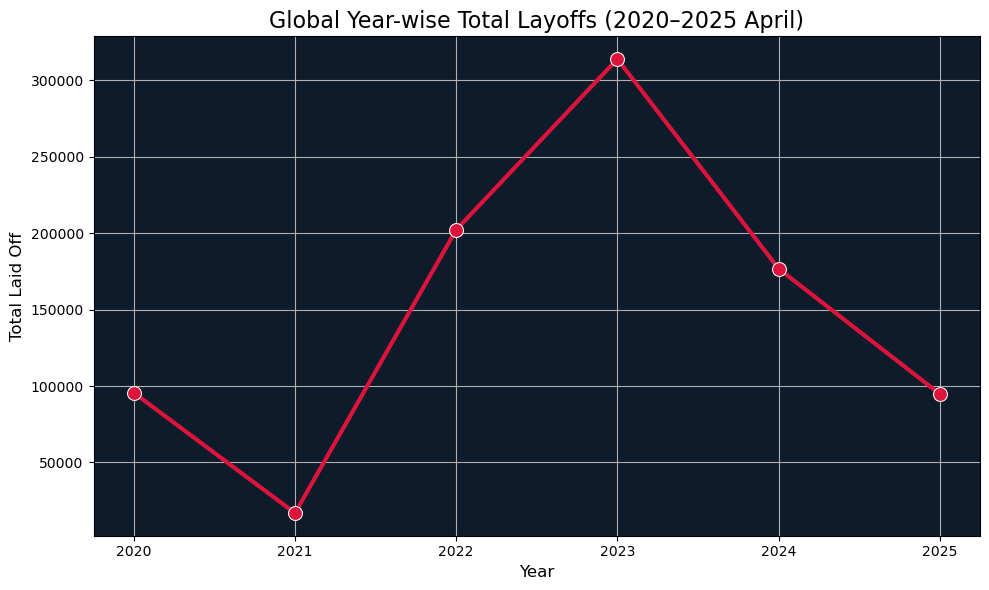

In [126]:
plt.figure(figsize=(10,6))
plt.gca().set_facecolor('#0d1b2a')
sns.lineplot(
    x='year', 
    y='total_laid_off', 
    data=yearly_layoffs, 
    marker='o',
    markersize = 10,
    linewidth = 3,
    color='crimson'
)
plt.title("Global Year-wise Total Layoffs (2020–2025 April)",fontsize = 16)
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Total Laid Off", fontsize = 12)
plt.xticks(yearly_layoffs['year'])  # ensure only available years on x-axis
plt.grid(True)
plt.tight_layout()
plt.savefig('lineplot for Year-wise Total Layoffs')

### The year-wise trend reveals a sharp surge in layoffs, peaking in 2023 with over 300,000 job cuts. Between 2021 and 2023, workforce reductions accelerated dramatically, largely reflecting the prolonged impact of the COVID-19 pandemic on global businesses and its aftereffects shook the job market. This highlights how economic recovery was uneven, with many industries forced to downsize even after the initial crisis and the employees ended up paying the price.

In [127]:
# Month-wise total layoffs (ignoring year)
monthly_layoffs = df.groupby('month_name')['total_laid_off'].sum()
monthly_layoffs = monthly_layoffs.sort_values(ascending = False)

In [128]:
monthly_layoffs

month_name
January      148881.5
April        110779.5
February      86875.5
November      85029.5
May           83897.0
March         78270.5
August        72019.0
July          71697.5
June          63496.0
October       41807.0
December      32947.0
September     24734.5
Name: total_laid_off, dtype: float64

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_18588\3970112217.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


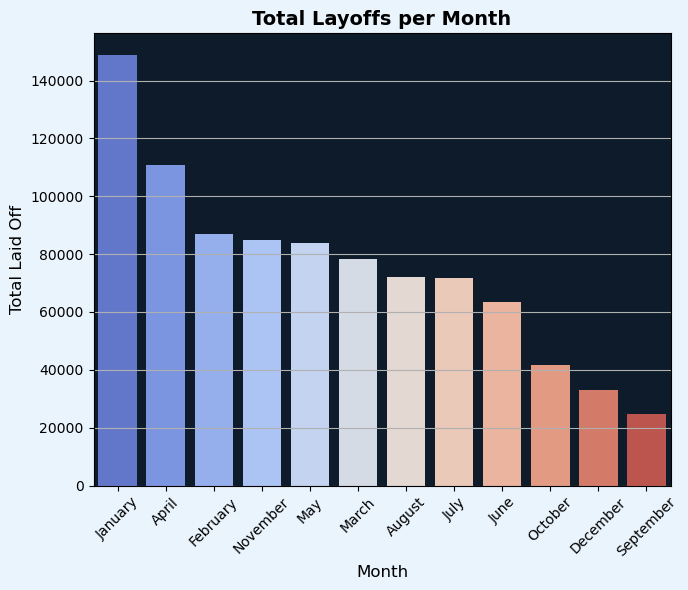

In [129]:
plt.figure(figsize=(7,6))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')
sns.barplot(
    x=monthly_layoffs.index,        
    y=monthly_layoffs.values,       
    palette='coolwarm'              
)
plt.title("Total Layoffs per Month", fontsize=14, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Laid Off", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis = 'y')
plt.tight_layout()
plt.savefig('Barplot for Total Layoffs per Month')

### Across the last 5 years, January has consistently been the toughest month for employees, with layoffs piling up to more than 1.4 lakh. April also showed heavy cuts (~1.1 lakh), while September stood out as the most stable month, recording just about 22k layoffs. This pattern hints that companies often start the year by making the hardest workforce decisions.

In [130]:
# Pivot table: rows = year, columns = month, values = total layoffs
monthly_heatmap = df.pivot_table(
    index='year',
    columns='month_name',
    values='total_laid_off',
    aggfunc='sum'
)

# Reorder columns to calendar order
months_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_heatmap = monthly_heatmap[months_order]

monthly_heatmap

month_name,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2020,NaN,NaN,12413.0,32490.0,27898.5,8455.0,7724.0,2755.0,1428.0,815.5,775.0,852.0
2021,6955.0,968.0,244.5,311.0,71.0,2434.0,80.0,1867.0,485.0,72.0,2070.0,1335.0
2022,749.0,3900.0,5967.5,4531.5,14136.0,23076.0,20736.5,18236.0,9396.0,24061.0,61734.0,15713.5
2023,99641.5,45497.0,41364.0,22925.0,17811.5,15597.5,15283.0,14176.0,7122.0,11143.5,12510.5,10913.0
2024,37874.5,18965.0,8959.5,24664.0,12689.0,11511.5,10433.5,28428.5,5553.5,5715.0,7940.0,4133.5
2025,3661.5,17545.5,9322.0,25858.0,11291.0,2422.0,17440.5,6556.5,750.0,NaN,NaN,NaN


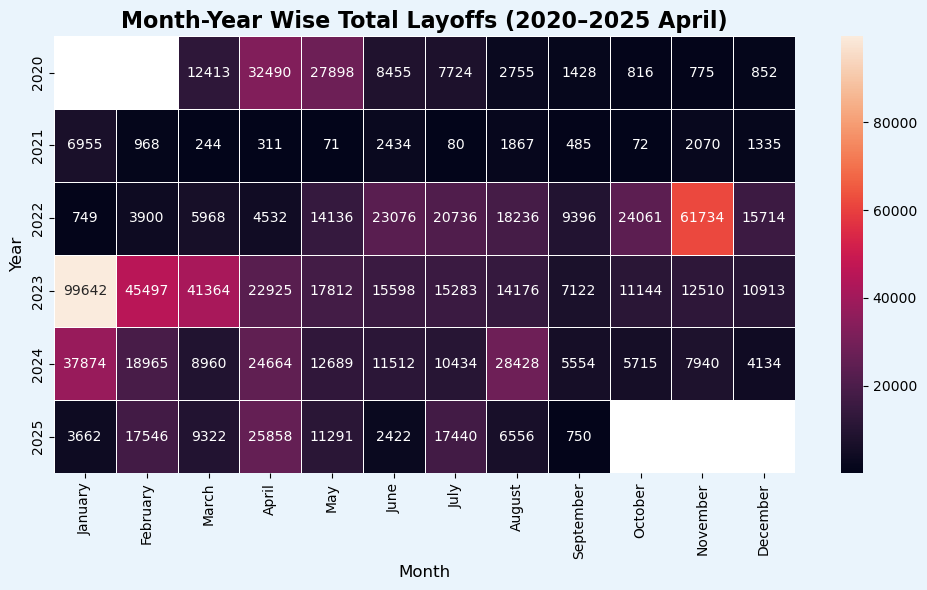

In [131]:
plt.figure(figsize=(10,6))
plt.gcf().set_facecolor('#eaf4fc')
sns.heatmap(
    monthly_heatmap,
    annot=True,
    fmt=".0f",
    cmap='rocket',
    linewidths=0.5
)

plt.title("Month-Year Wise Total Layoffs (2020–2025 April)", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Year", fontsize=12)
plt.tight_layout()
plt.savefig('Heatmap for Month-Year wise Total Layoff')

### When we break the layoffs down year by year, some striking patterns appear. In 2020, right at the start of the pandemic, April saw the highest layoffs. The following year, 2021, it was January that took the lead. Moving into 2022, November emerged as the peak month, while in 2023, January recorded the single highest spike across all five years — making it the toughest month overall for employees worldwide. Even in 2024, January stayed on top, and by 2025, April was already showing significant layoffs. Clearly, January consistently stands out as the most vulnerable month for job cuts, with 2023 being the year that hit the hardest.

In [132]:
# Group by year and month_name
monthly_layoffs = df.groupby(['year', 'month_name'])['total_laid_off'].sum().reset_index()

# Optional: To keep months in calendar order
months_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
monthly_layoffs['month_name'] = pd.Categorical(monthly_layoffs['month_name'], categories=months_order, ordered=True)
monthly_layoffs = monthly_layoffs.sort_values(['year','month_name'])
monthly_layoffs

,year,month_name,total_laid_off
5,2020,March,12413.0
0,2020,April,32490.0
6,2020,May,27898.5
4,2020,June,8455.0
3,2020,July,7724.0
...,...,...,...
65,2025,May,11291.0
63,2025,June,2422.0
62,2025,July,17440.5
59,2025,August,6556.5


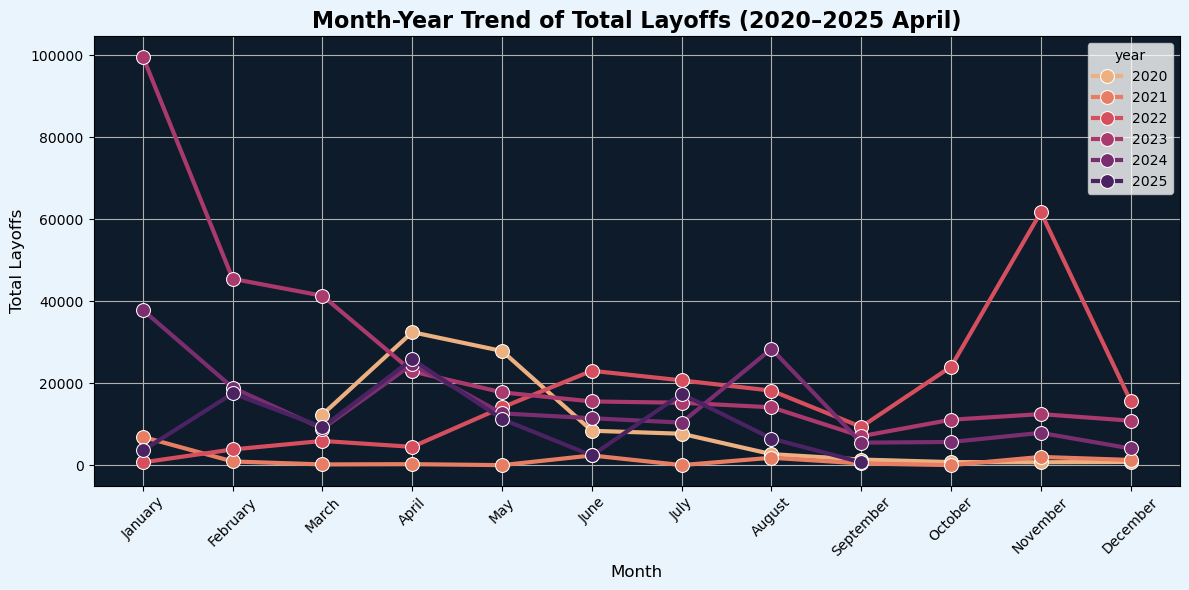

In [133]:
plt.figure(figsize=(12,6))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')
sns.lineplot(
    data=monthly_layoffs,
    x='month_name',
    y='total_laid_off',
    hue='year',
    marker='o',
    markersize = 10,
    linewidth = 3,
    palette='flare'
)

plt.title("Month-Year Trend of Total Layoffs (2020–2025 April)", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Layoffs", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('Lineplot for Month-Year Trend of Total Layoffs')

### The month-year trend shows clear spikes: November 2022 and January 2023 saw the heaviest layoffs, with February 2023 following closely. The job market was definitely on a rollercoaster during this period, with employees feeling the impact the most.

In [134]:
# Sum of total layoffs per country

country_layoffs = df.groupby('country', as_index = False)['total_laid_off'].sum()

In [135]:
top10_countries = country_layoffs.nlargest(10, 'total_laid_off')
top10_countries

,country,total_laid_off
63,United States,616926.0
24,India,66945.0
19,Germany,34473.5
62,United Kingdom,27880.5
37,Netherlands,20251.0
55,Sweden,19556.0
7,Canada,18905.5
5,Brazil,12457.0
27,Israel,12242.5
10,China,10759.0


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_18588\1106457646.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


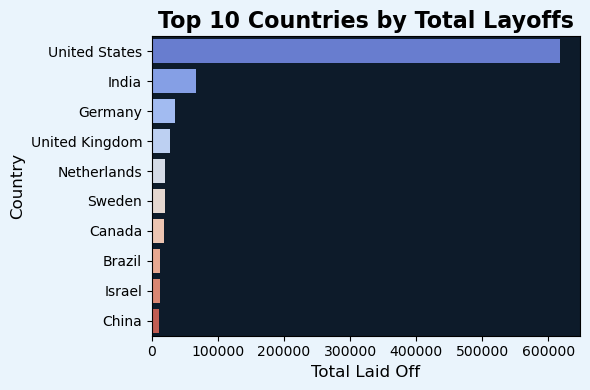

In [136]:
plt.figure(figsize=(6,4))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')
ax = sns.barplot(
    y='country',    
    x='total_laid_off',
    data=top10_countries,
    palette='coolwarm'
)

plt.title("Top 10 Countries by Total Layoffs", fontsize=16, fontweight='bold')
plt.xlabel("Total Laid Off", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.tight_layout()
plt.savefig('Top 10 Countries by Total Layoffs')

### Looking at the global picture, the United States clearly faced the brunt, with layoffs crossing 6 lakh over the period. India followed with around 1 lakh, while China experienced the fewest cuts. It really shows how differently the pandemic and economic shifts impacted countries — some regions bore the hardest hits, while others remained relatively stable.

In [137]:
# Group by location and sum total layoffs
location_layoffs = df.groupby('location')['total_laid_off'].sum().reset_index()

# Sort descending and take top 10
top10_locations = location_layoffs.sort_values(by='total_laid_off', ascending=False).head(10)
top10_locations

,location,total_laid_off
210,Sf Bay Area,270741.0
207,Seattle,79093.0
166,New York City,52993.5
10,Austin,38660.5
19,Bengaluru,37595.5
194,Sacramento,27991.5
26,Boston,27385.5
132,London,26032.0
5,Amsterdam,19807.0
220,Stockholm,19120.0


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_18588\1142720943.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


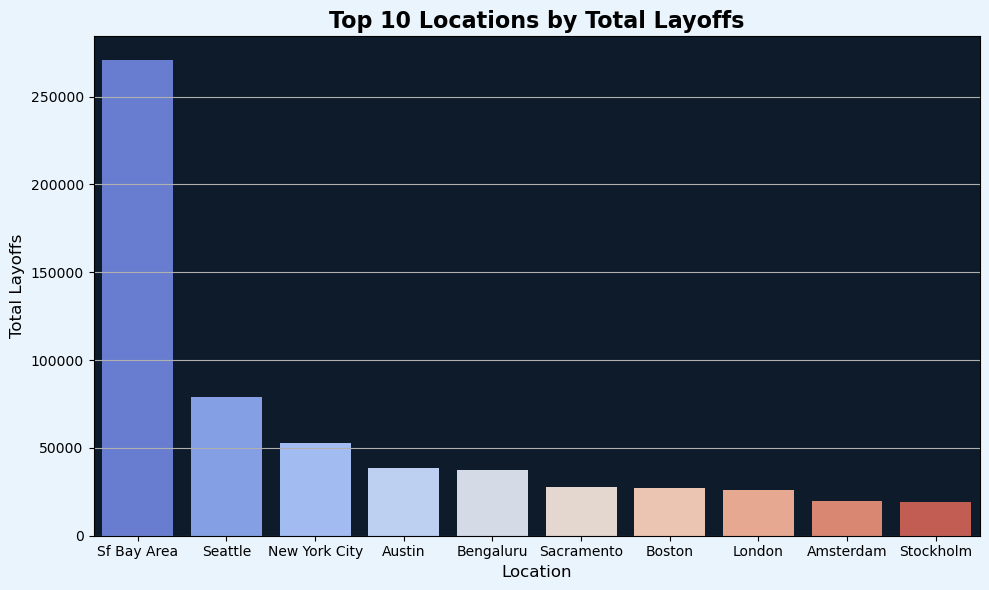

In [138]:
plt.figure(figsize=(10,6))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')
sns.barplot(
    data=top10_locations,
    y='total_laid_off',
    x='location',
    palette='coolwarm'
)

plt.title("Top 10 Locations by Total Layoffs", fontsize=16, fontweight='bold')
plt.ylabel("Total Layoffs", fontsize=12)
plt.xlabel("Location", fontsize=12)
plt.grid(True, axis = 'y')
plt.tight_layout()
plt.savefig('Barplot for Location by Layoffs')

### Zooming in from countries to specific cities, the SF Bay Area clearly stands out, with layoffs crossing 2.5 lakh. Seattle followed with around 70,000, and New York City wasn’t far behind at 50,000. Austin, Bengaluru, and other locations also felt the impact, but on a smaller scale. This really shows how certain tech hubs and business centers bore the brunt of workforce reductions during these years.

In [139]:
company_layoffs = df.groupby('company', as_index=False)['total_laid_off'].sum()

In [140]:
company_layoffs = company_layoffs.sort_values(by='total_laid_off', ascending=False).head(10)
company_layoffs

,company,total_laid_off
1233,Intel,43726.0
1551,Microsoft,30673.0
95,Amazon,28540.0
1543,Meta,25000.0
2089,Salesforce,16140.0
2404,Tesla,14629.0
497,Cisco,14521.0
1031,Google,14247.0
690,Dell,13261.0
2104,Sap,11000.0


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_18588\1221045266.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


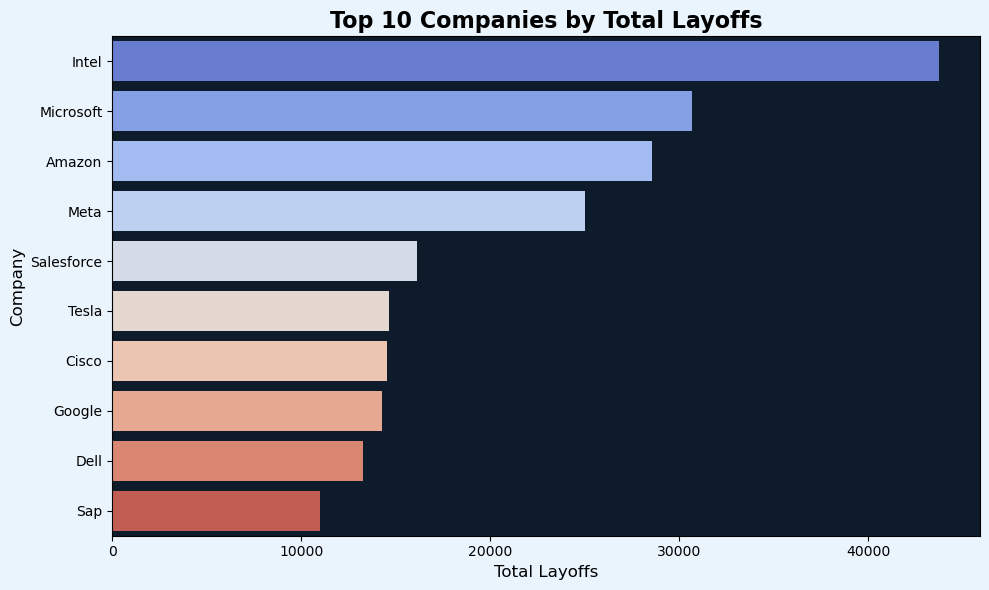

In [141]:
plt.figure(figsize=(10,6))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')
sns.barplot(
    x='total_laid_off',
    y='company',
    data=company_layoffs,
    palette='coolwarm'
)
plt.title("Top 10 Companies by Total Layoffs", fontsize=16, fontweight='bold')
plt.xlabel("Total Layoffs", fontsize=12)
plt.ylabel("Company", fontsize=12)
plt.tight_layout()
plt.savefig('Barplot for Companies by Total Layoffs')

### When we look at individual companies, Intel takes the lead, with layoffs exceeding 40,000. Microsoft follows closely with around 30,000, and Amazon comes next at 28,000, while Meta experienced about 25,000. Other companies like Salesforce, Tesla, Cisco, and Google also contributed to the numbers. This really highlights how even some of the biggest tech players faced significant workforce reductions, reflecting broader shifts in the industry after the pandemic.

In [142]:
# Sum of total_laid_off per industry

industry_layoffs = df.groupby('industry', as_index=False)['total_laid_off'].sum().sort_values('total_laid_off', ascending=False)

In [143]:
# Top 10 industries

industry_layoffs_top10 = industry_layoffs.head(10)
industry_layoffs_top10

,industry,total_laid_off
11,Hardware,93554.5
20,Other,92777.0
3,Consumer,86656.0
24,Retail,84921.0
29,Transportation,74773.0
8,Finance,64175.0
10,Food,60348.0
12,Healthcare,48544.0
30,Travel,27891.0
22,Real Estate,26946.0


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_18588\1445090069.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


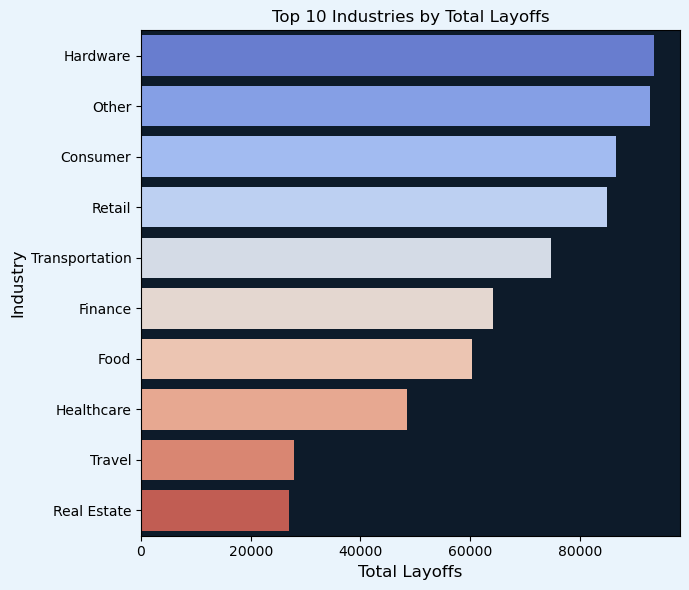

In [144]:
plt.figure(figsize=(7,6))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')
sns.barplot(
    y ='industry', 
    x ='total_laid_off', 
    data =industry_layoffs_top10, 
    palette ='coolwarm'
)
plt.title("Top 10 Industries by Total Layoffs")
plt.xlabel('Total Layoffs', fontsize = 12)
plt.ylabel("Industry", fontsize = 12)
plt.tight_layout()
plt.savefig('Barplot for Industries by Total Layoffs')

### Looking at industries post-Covid, the Hardware sector clearly faced the biggest blow, with layoffs exceeding 90,000. Consumer, Retail, and Transportation industries followed closely, showing that no sector was entirely spared. It’s fascinating to see how certain industries, especially tech-related ones, were hit hardest, reflecting both market shifts and pandemic-driven changes in demand.

In [145]:
# Group by year and industry and sum total layoffs
year_industry = df.groupby(['year','industry'])['total_laid_off'].sum().reset_index()
year_industry

,year,industry,total_laid_off
0,2020,Aerospace,661.0
1,2020,Construction,1150.0
2,2020,Consumer,6463.0
3,2020,Crypto,436.0
4,2020,Data,1908.0
...,...,...,...
159,2025,Security,1383.0
160,2025,Software,35.0
161,2025,Support,835.0
162,2025,Transportation,3393.0


In [146]:
top_industry_per_year = year_industry.loc[year_industry.groupby('year')['total_laid_off'].idxmax()].reset_index(drop=True)
top_industry_per_year

,year,industry,total_laid_off
0,2020,Travel,16586.0
1,2021,Consumer,3800.0
2,2022,Retail,24014.0
3,2023,Other,42537.0
4,2024,Hardware,28944.5
5,2025,Hardware,32574.5


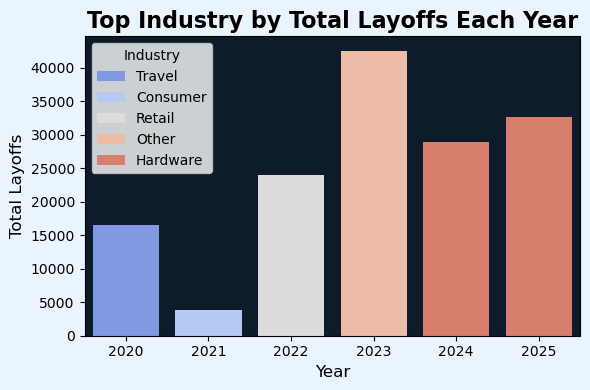

In [147]:
plt.figure(figsize=(6,4))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')
sns.barplot(
    data=top_industry_per_year,
    x='year',
    y='total_laid_off',
    hue='industry',
    dodge=False,
    palette='coolwarm'
)

plt.title("Top Industry by Total Layoffs Each Year", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Layoffs", fontsize=12)
plt.legend(title = 'Industry')
plt.tight_layout()
plt.savefig('Barplot for Top Industry by Total Layoffs Each Year')

### Breaking it down year by year, the impact of layoffs really tells a story. In 2020, the Travel industry bore the brunt, reflecting the immediate shock of the pandemic. By 2021, Consumer companies faced the highest cuts, followed by Retail in 2022. Interestingly, In 2023 saw the largest wave of layoffs in some other industries, crossing 40,000, before Hardware emerged as the hardest-hit sector in 2024 and 2025, with around 27,000 and 32,000 respectively. Even though 2025 isn’t fully complete yet.

In [148]:
# Sum total layoffs per country
country_total = df.groupby('country')['total_laid_off'].sum().reset_index()

# Top 10 countries
top10_countries = country_total.sort_values(by='total_laid_off', ascending=False).head(10)
top10_countries

,country,total_laid_off
63,United States,616926.0
24,India,66945.0
19,Germany,34473.5
62,United Kingdom,27880.5
37,Netherlands,20251.0
55,Sweden,19556.0
7,Canada,18905.5
5,Brazil,12457.0
27,Israel,12242.5
10,China,10759.0


In [149]:
top_industry_per_country = []

for country in top10_countries['country']:
    temp = df[df['country'] == country].groupby('industry')['total_laid_off'].sum().reset_index()
    top_industry = temp.sort_values(by='total_laid_off', ascending=False).head(1)  # top 1 industry
    top_industry['country'] = country  # keep country info
    top_industry_per_country.append(top_industry)

# Combine results
top_industry_per_country_df = pd.concat(top_industry_per_country, ignore_index=True)
top_industry_per_country_df

,industry,total_laid_off,country
0,Hardware,88550.5,United States
1,Education,15414.0,India
2,Other,12251.0,Germany
3,Food,9961.0,United Kingdom
4,Healthcare,10000.0,Netherlands
5,Other,8650.0,Sweden
6,Retail,5213.0,Canada
7,Finance,4419.0,Brazil
8,Energy,2354.0,Israel
9,Consumer,3945.0,China


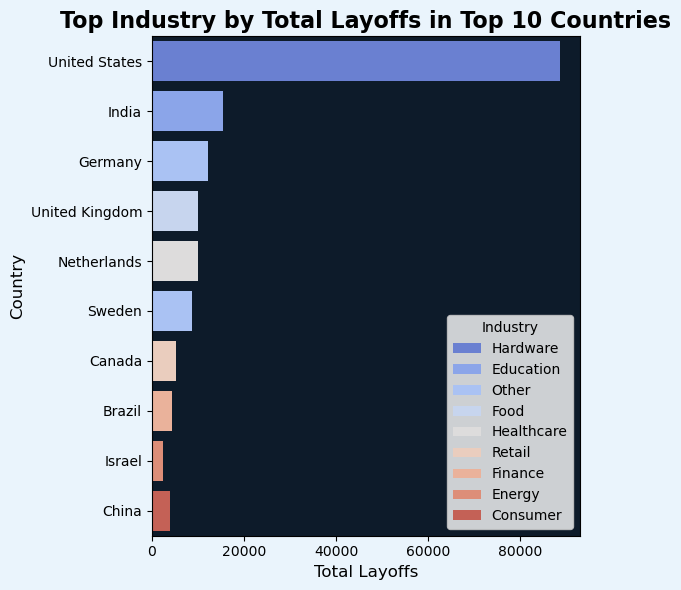

In [150]:
plt.figure(figsize=(6,6))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')
sns.barplot(
    data=top_industry_per_country_df,
    x='total_laid_off',
    y='country',
    hue='industry',
    dodge=False,
    palette='coolwarm'
)

plt.title("Top Industry by Total Layoffs in Top 10 Countries", fontsize=16, fontweight='bold')
plt.xlabel("Total Layoffs", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.legend(title='Industry')
plt.tight_layout()
plt.savefig('Barplot for Top Industry by Total Layoffs in Top 10 Countries')

### Looking at Top 10 countries with highest layoffs. The US leads with 80k+ Hardware layoffs, India’s Education sector and Germany’s ‘Other’ category faced major cuts, while the UK was hit most in Food. This shows how layoffs weren’t just concentrated in one sector globally. Post-Covid layoffs varied widely across countries and industries.

In [151]:
# Group by stage and sum total layoffs
stage_total = df.groupby('stage')['total_laid_off'].sum().reset_index()

# Sort descending
stage_total = stage_total.sort_values(by='total_laid_off', ascending=False)
stage_total

,stage,total_laid_off
1,Post-Ipo,478719.5
15,Unknown,101464.5
0,Acquired,79979.0
5,Series B,45275.5
6,Series C,40400.0
7,Series D,35381.0
8,Series E,28870.0
4,Series A,18637.0
9,Series F,16937.5
2,Private Equity,14151.5


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_18588\2366264261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


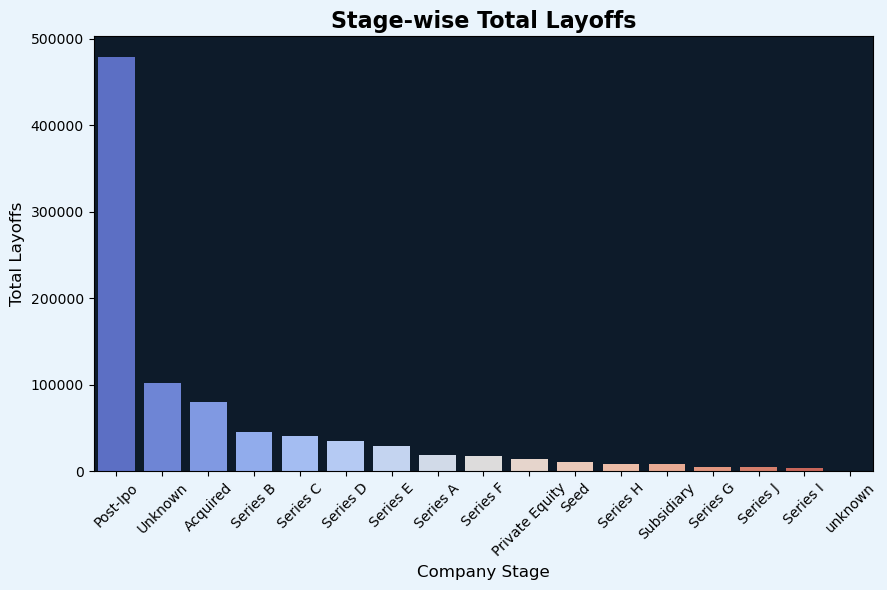

In [152]:
plt.figure(figsize=(9,6))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')
sns.barplot(
    data=stage_total,
    x='stage',
    y='total_laid_off',
    palette='coolwarm'
)

plt.title("Stage-wise Total Layoffs", fontsize=16, fontweight='bold')
plt.xlabel("Company Stage", fontsize=12)
plt.ylabel("Total Layoffs", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Barplot for Stage-Wise Total Layoffs')

### Looking at company stages, it’s clear that Post-IPO companies faced the largest layoffs (~500k), followed by Unknown and Acquired stages, while early-stage (Series I) startups saw the least workforce reductions. This pattern highlights how business maturity and funding stages influenced workforce reductions post-Covid.

In [153]:
# Group by stage and sum total layoffs and funds raised
stage_funding = df.groupby('stage').agg({
    'total_laid_off':'sum',
    'funds_raised_millions':'sum'
}).reset_index()

# Sort by total layoffs descending
stage_funding = stage_funding.sort_values(by='total_laid_off', ascending=False)
stage_funding

,stage,total_laid_off,funds_raised_millions
1,Post-Ipo,478719.5,1810663.0
15,Unknown,101464.5,302049.0
0,Acquired,79979.0,121612.0
5,Series B,45275.5,48542.0
6,Series C,40400.0,85704.0
7,Series D,35381.0,127176.0
8,Series E,28870.0,117052.0
4,Series A,18637.0,11216.0
9,Series F,16937.5,79131.0
2,Private Equity,14151.5,56117.0


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_18588\1428925822.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


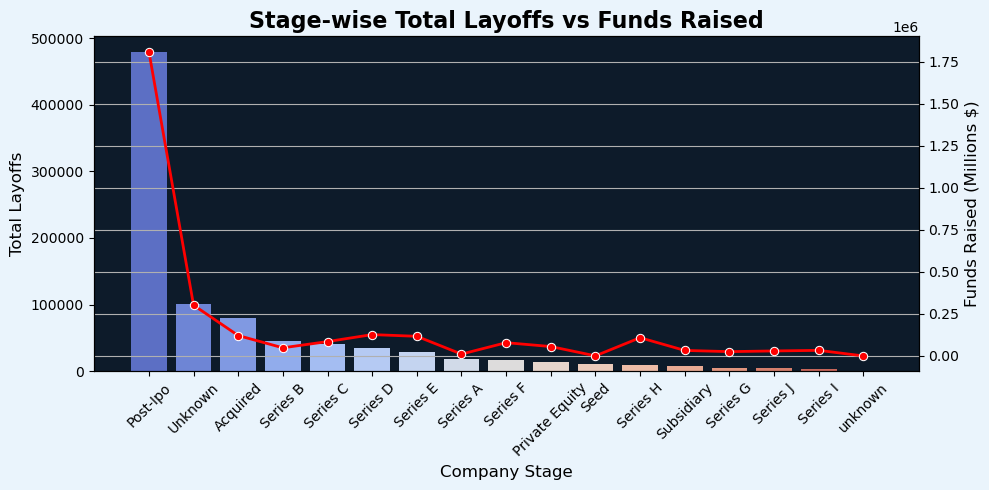

In [154]:
fig, ax1 = plt.subplots(figsize=(10,5))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')
sns.barplot(
    data=stage_funding,
    x='stage',
    y='total_laid_off',
    palette='coolwarm',
    ax=ax1
)

ax1.set_ylabel('Total Layoffs', fontsize=12)
ax1.set_xlabel('Company Stage', fontsize=12)
ax1.set_title("Stage-wise Total Layoffs vs Funds Raised", fontsize=16, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# Line plot: Funding raised (secondary y-axis)
ax2 = ax1.twinx()
sns.lineplot(
    data=stage_funding,
    x='stage',
    y='funds_raised_millions',
    color='red',
    marker='o',
    linewidth=2,
    ax=ax2
)
ax2.set_ylabel('Funds Raised (Millions $)', fontsize=12)
plt.grid(True, axis = 'y')
plt.tight_layout()
plt.savefig('Stage-wise Total Layoffs vs Funds Raised')

### When we look at total layoffs alongside company stage and funding, a clear pattern emerges: Post-IPO companies not only had the highest layoffs but also raised the most funding—over 1.75 (Million $). While Series I startups experienced the fewest layoffs, which aligns with their comparatively lower funding.

In [155]:
funding_layoffs = df.groupby("company", as_index=False).agg({
    "total_laid_off": "sum",
    "funds_raised_millions": "max"   # max funding value for each company
})

# Sort by funding and take Top 10
top10_companies = funding_layoffs.sort_values(
    by="funds_raised_millions", ascending=False
).head(10)

print("Top 10 Companies by Funding and their Total Layoffs:")
print(top10_companies)

Top 10 Companies by Funding and their Total Layoffs:
        company  total_laid_off  funds_raised_millions
1649    Netflix           505.0               121900.0
2728      Xerox          3000.0                27200.0
1543       Meta         25000.0                26000.0
2542       Uber          7785.0                25200.0
2683     Wework          1250.0                22200.0
2404      Tesla         14629.0                20200.0
1042       Grab          1360.0                16500.0
615      Cruise          2050.0                15000.0
1677  Northvolt          4400.0                13800.0
914    Flipkart          1200.0                12900.0


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_18588\3960152113.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


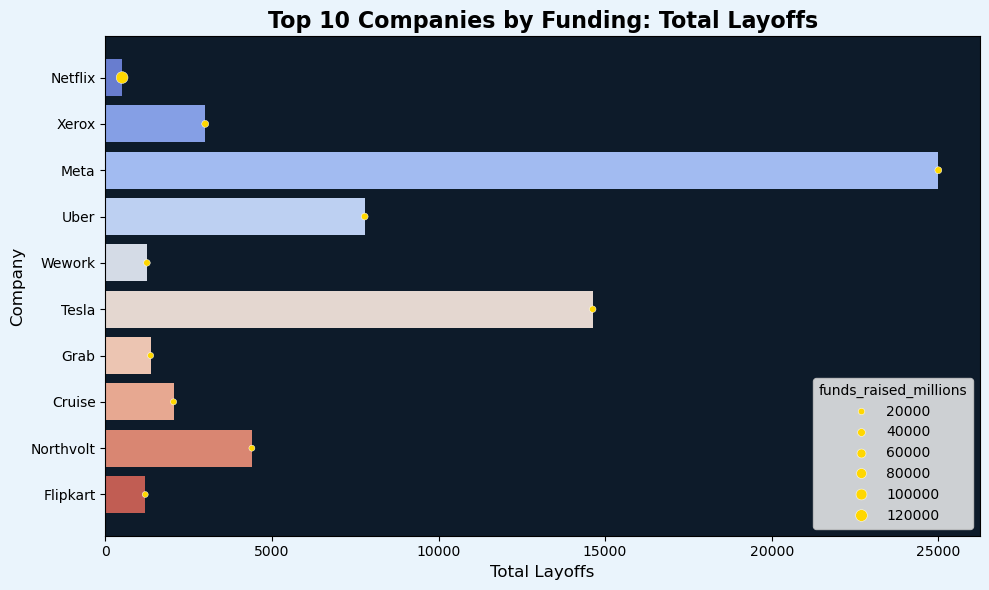

In [156]:
plt.figure(figsize=(10,6))
plt.gca().set_facecolor('#0d1b2a')   
plt.gcf().set_facecolor('#eaf4fc')   

# Barplot for layoffs
sns.barplot(
    data=top10_companies,
    x="total_laid_off",
    y="company",
    palette="coolwarm"
)

# Scatterplot overlay for funding
sns.scatterplot(
    data=top10_companies,
    x="total_laid_off",
    y="company",
    size="funds_raised_millions",
    legend=True,
    color="gold",
    marker="o"
)

plt.title("Top 10 Companies by Funding: Total Layoffs", fontsize=16, fontweight="bold", color="black")
plt.xlabel("Total Layoffs", fontsize=12)
plt.ylabel("Company", fontsize=12)
plt.tight_layout()
plt.savefig("Top 10 Companies by Funding and Layoffs")

### Looking at the top 10 companies, some interesting contrasts emerge. Netflix raised the highest funding yet had the fewest layoffs, while Meta faced the largest cuts. Flipkart, despite the lowest funding, also kept layoffs low. This highlights that funding isn’t everything, strategy and timing play a big role.

In [157]:
# Group by industry and calculate mean of percentage laid off

industry_avg_pct = df.groupby('industry')['percentage_laid_off'].mean().reset_index()

In [158]:
industry_avg_pct = industry_avg_pct.sort_values(by='percentage_laid_off', ascending=False)

industry_avg_pct.head()

,industry,percentage_laid_off
0,Aerospace,37.750000
7,Energy,32.956522
27,Software,32.500000
10,Food,32.380753
1,Ai,31.541667


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_18588\2640006767.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


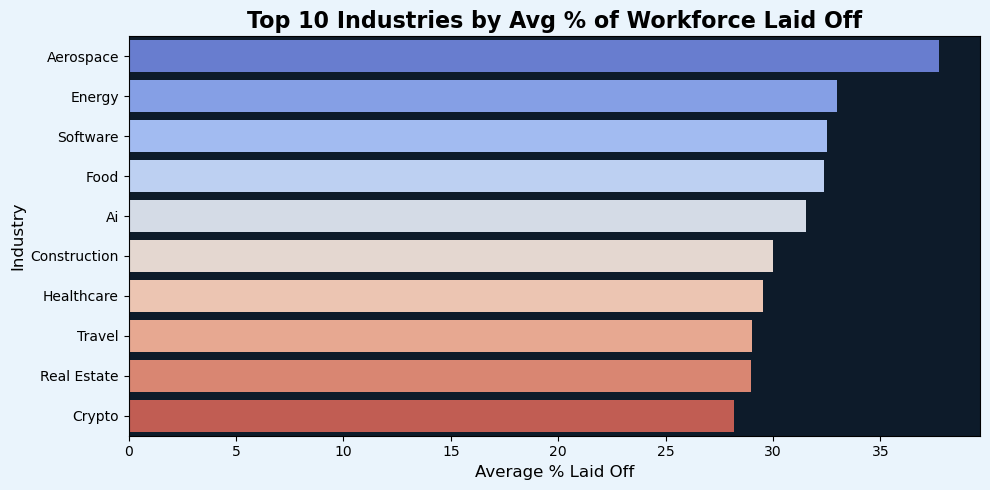

In [159]:
plt.figure(figsize=(10,5))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')
sns.barplot(
    data=industry_avg_pct.head(10),  
    x='percentage_laid_off',
    y='industry',
    palette='coolwarm'
)

plt.title("Top 10 Industries by Avg % of Workforce Laid Off", fontsize=16, fontweight='bold')
plt.xlabel("Average % Laid Off", fontsize=12)
plt.ylabel("Industry", fontsize=12)
plt.tight_layout()
plt.savefig('Top 10 Industries by Avg % Laid off')

### When we look at the average percentage of layoffs across industries, the Aerospace induustry really took the biggest hit—about 37% of its workforce laid off. Other industries Energy, Software, and Food weren’t far behind at around 32%. It’s a stark reminder that some industries felt the impact more intensely, no matter their size.

In [160]:
# Group by company to get both total and avg % laid off
company_layoffs = df.groupby('company').agg({
    'total_laid_off': 'sum',
    'percentage_laid_off': 'mean'
}).reset_index()

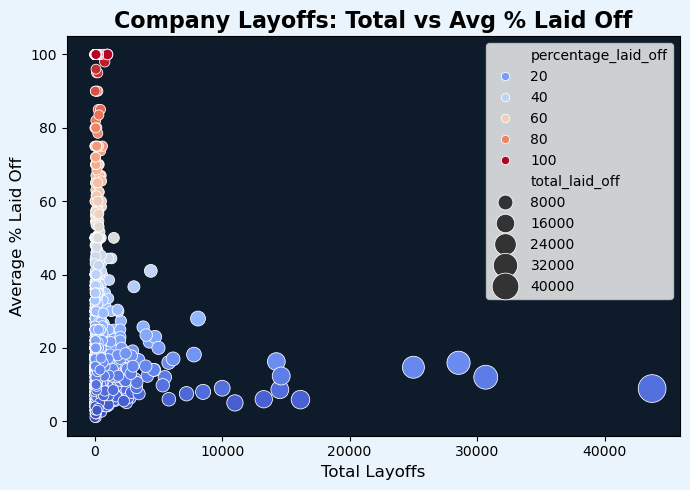

In [161]:
plt.figure(figsize=(7,5))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')
sns.scatterplot(
    data=company_layoffs,
    x='total_laid_off',
    y='percentage_laid_off',
    hue='percentage_laid_off',
    size='total_laid_off',
    palette='coolwarm',
    sizes=(50, 400)
)

plt.title("Company Layoffs: Total vs Avg % Laid Off", fontsize=16, fontweight='bold')
plt.xlabel("Total Layoffs", fontsize=12)
plt.ylabel("Average % Laid Off", fontsize=12)
plt.tight_layout()
plt.savefig('Total vs Avg % Laid off')

### Looking at companies individually, some interesting patterns emerge. A company had very high total layoffs—over 50,000—but the percentage impacted was surprisingly low, under 10%, showing they have massive workforces. On the flip side, some smaller companies had total layoffs under 8,000 yet lost nearly 100% of their workforce. Overall, most companies experienced 0–20% layoffs with fewer than 10,000 employees affected. 

In [162]:
# Group by stage and calculate average % layoffs
stage_avg_pct = df.groupby('stage')['percentage_laid_off'].mean().reset_index()

stage_avg_pct = stage_avg_pct.sort_values(by='percentage_laid_off', ascending=False)
stage_avg_pct.head()

,stage,percentage_laid_off
3,Seed,67.838235
4,Series A,37.209434
15,Unknown,29.642045
5,Series B,29.605376
0,Acquired,24.652406


C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_18588\5581678.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


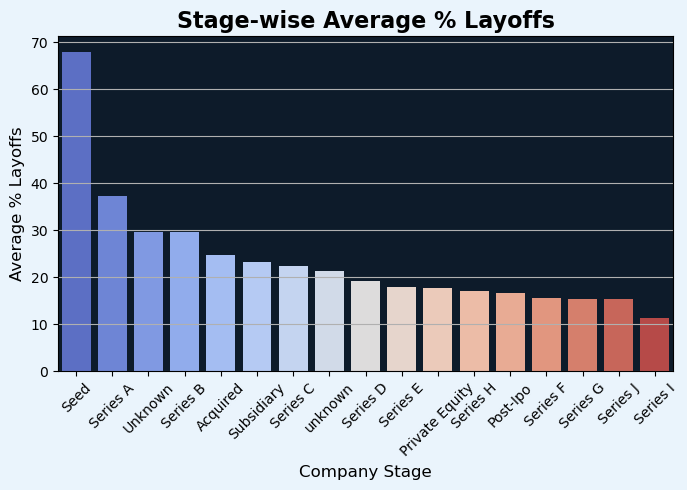

In [163]:
plt.figure(figsize=(7,5))
plt.gca().set_facecolor('#0d1b2a')
plt.gcf().set_facecolor('#eaf4fc')
sns.barplot(
    data=stage_avg_pct,
    x='stage',
    y='percentage_laid_off',
    palette='coolwarm'
)

plt.title("Stage-wise Average % Layoffs", fontsize=16, fontweight='bold')
plt.xlabel("Company Stage", fontsize=12)
plt.ylabel("Average % Layoffs", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, axis = 'y')
plt.tight_layout()
plt.savefig('Stage-Wise Avg % Layoffs')

### When we look at layoffs by company stage, the Seed stage felt the heaviest blow, with about 70% of employees let go. Series A companies experienced a more moderate impact at around 35%, while Series I companies were the most stable, seeing only about 11% layoffs. This clearly shows that younger startups were far more vulnerable in the post-Covid landscape.

In [164]:
bins = [0, 25, 50, 75, 100]
labels = ['0-25%', '26-50%', '51-75%', '76-100%']
df['percentage_bin'] = pd.cut(df['percentage_laid_off'], bins=bins, labels=labels, include_lowest=True)

C:\Users\Jyoti Bansal\AppData\Local\Temp\ipykernel_18588\1027515489.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


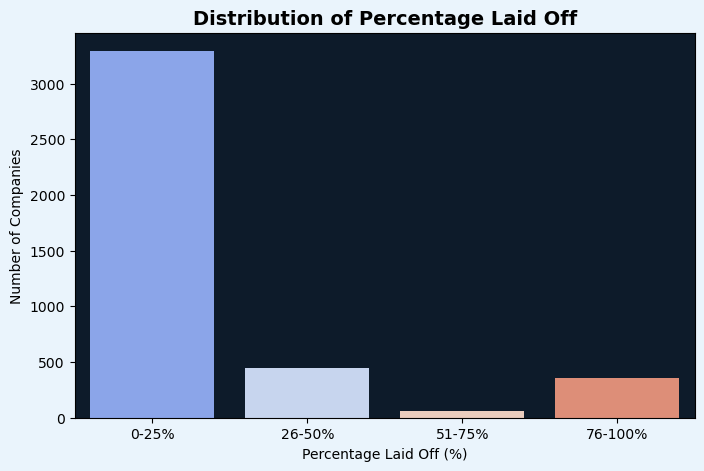

In [165]:
plt.figure(figsize=(8,5))
plt.gcf().set_facecolor('#eaf4fc')
plt.gca().set_facecolor('#0d1b2a')
sns.countplot(
    data=df,
    x="percentage_bin",
    palette="coolwarm"
)
plt.title("Distribution of Percentage Laid Off", fontsize=14, fontweight="bold")
plt.xlabel("Percentage Laid Off (%)")
plt.ylabel("Number of Companies")
plt.savefig('Distribution of Percentage Laid off')

### Looking at the percentage of layoffs across companies, we see that most firms—around 3,200—kept layoffs between 0–25%. A smaller group, roughly 500 companies, experienced 26–50% reductions. Very few faced 51–75% layoffs, while around 400–500 companies went through the most extreme cuts of 76–100%. This shows that while extreme layoffs were rare, a majority of companies still experienced moderate workforce reductions.

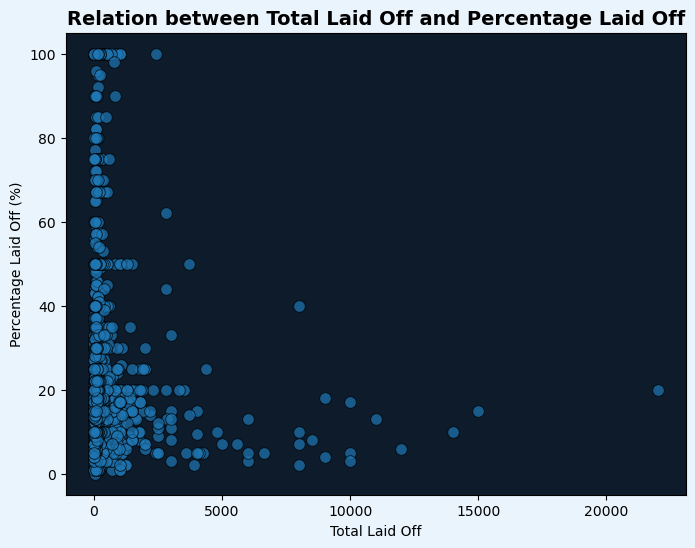

In [166]:
plt.figure(figsize=(8,6))
plt.gcf().set_facecolor('#eaf4fc')
plt.gca().set_facecolor('#0d1b2a')
sns.scatterplot(
    data=df,
    x="total_laid_off",
    y="percentage_laid_off",
    alpha = 0.7,
    s = 70,
    color = '#1f77b4',
    edgecolor = 'black'
)
plt.title("Relation between Total Laid Off and Percentage Laid Off", fontsize=14, fontweight="bold")
plt.xlabel("Total Laid Off")
plt.ylabel("Percentage Laid Off (%)")
plt.savefig('Scatter Plot for relation bw Total layoffs & % laid offs')

### Exploring the relationship between total layoffs and percentage layoffs, we notice that most workforce reductions happened in the 0–20% range, typically involving 0–5,000 employees per record. Interestingly, cases where 100% of employees were laid off involve very small teams, highlighting that high-percentage layoffs are mostly limited to smaller companies, while larger layoffs tend to be partial rather than total.

---

# Conclusion

### The post-COVID era reshaped the global job market in ways that were both unprecedented and revealing. From 2020 onwards, layoffs surged across industries, but the intensity varied by time, location, and company stage. The data shows that 2023 was the peak layoff year, with over 300,000 employees losing jobs, highlighting how the aftershocks of the pandemic continued long after the initial crisis.

### Seasonality also played a role-January consistently emerged as the harshest month, with companies often announcing mass workforce cuts at the start of the year. On the geographic front, the United States alone accounted for the majority of global layoffs, while India and Europe followed at a distant second. Within the U.S., hubs like the Bay Area, Seattle, and New York City were hit hardest, reflecting how layoffs were concentrated in major tech and innovation centers.

### From an industry perspective, hardware, retail, and consumer sectors carried the heaviest burden, though the spotlight shifted year by year—travel in 2020, consumer in 2021, retail in 2022, and hardware dominating the later years marking it as the most fragile sector post-pandemic. At the company stage level, layoffs were most severe at the post-IPO stage, showing that even well-funded, established firms weren’t immune to workforce reductions. Meanwhile, early-stage startups like those in seed or Series A rounds often faced layoffs that were smaller in absolute numbers but larger in percentage terms.

### At the company level, the contrast was striking: giants like Meta, Intel, and Microsoft led in absolute layoffs, while firms like Netflix, despite being among the top funded, managed to keep workforce cuts relatively low. This gap underscores how strategic decision-making, not just funding levels, shaped resilience during turbulent times.

### Overall, this analysis reveals that post-COVID layoffs were not random shocks, but rather systematic workforce adjustments driven by industry cycles, funding pressures, and regional dependencies. They remind us how fragile even the biggest players can be during global disruptions, and how industries must learn to balance growth, risk, and resilience in an unpredictable world.

---

# If startups struggle with smaller teams, why do IPO-stage giants with huge funding still end up laying off the most people?

#### When we look closely, the pattern almost feels like two sides of the same coin. Startups, especially in their early growth stages, don’t have big cash cushions. So, the moment a crisis hits, they’re forced to cut deep - sometimes losing half or more of their teams just to survive.

#### IPO-stage companies, on the other hand, raise enormous amounts of money and scale at lightning speed. But that very speed becomes their weakness. They expand too fast, hire too big, and when the market turns, even a "small correction" translates into tens of thousands of jobs lost.

#### So the lesson is clear: it’s not just about how much money you raise, but how wisely you grow. Post-COVID, industries like hardware, retail, and travel remind us that resilience comes not from funding alone, but from sustainable growth and stronger risk management.

---

# Why do some industries collapse faster than others during global shocks?

#### Because not all sectors are built equally. Hardware, retail, and travel showed us how fragile traditional models can be when the world slows down. These industries urgently need to build resilient, adaptive strategies if they want to withstand the next disruption.

# If money means power, why did giants like Meta, Tesla, and Intel still cut jobs?

#### Funding doesn’t equal stability. These companies had billions at their disposal, yet even they resorted to massive layoffs. The truth is clear: financial strength alone cannot shield a company from poor planning or sudden downturns.


# Are all companies equally at risk, or do some stages carry higher dangers?

#### Not at all. Startups often face percentage-heavy cuts, but IPO-stage companies pose the largest systemic workforce risks. Their sheer size means even a small adjustment can put hundreds of thousands of jobs on the line - something policymakers and investors must keep in mind.

# Why did the U.S. dominate the layoff charts?

#### Because of concentration risk. With hubs like SF Bay Area and Seattle driving global tech, the U.S. became the epicenter of layoffs. The lesson? Diversifying talent globally can spread the risk and create a more balanced, shock-proof workforce.

# What’s the real fix to prevent mass layoffs?

#### It starts with smarter workforce planning. Companies need to rethink how they hire and scale - focusing on sustainable growth instead of overexpansion that eventually forces painful mass cuts.

---

# This project not only visualizes layoffs but also provides a lens into how businesses can prepare for future shocks in a more sustainable and resilient way.

---